# Import Library

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid") 

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")

# Read Dataset

In [3]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [108]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# Data Preparation

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
target - have disease or not (1=yes, 0=no)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [109]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Visulazations

<AxesSubplot:>

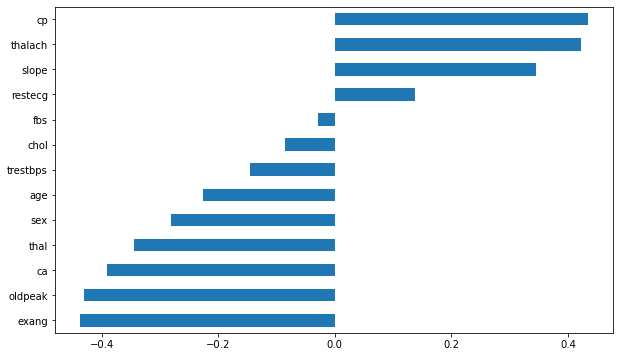

In [11]:
df.corr()['target'].drop('target').sort_values().plot.barh()

<AxesSubplot:>

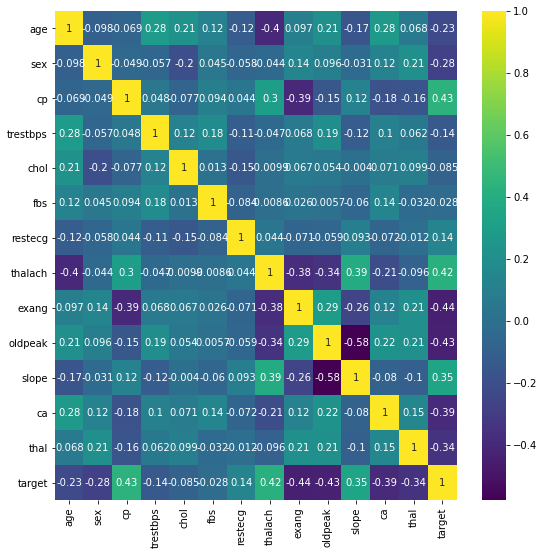

In [12]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True, cmap="viridis")

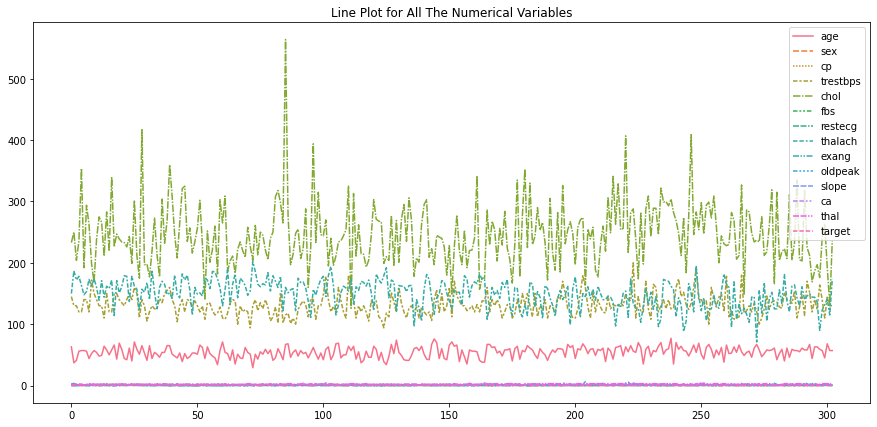

In [16]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df.select_dtypes(exclude="object"))

plt.title("Line Plot for All The Numerical Variables")
plt.show()

# Statistical Analysis

In [20]:
import scipy.stats as stats

In [21]:
for (colName, colData) in df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].iteritems():
    print("Feature name: {0}, Skewness: {1}".format(colName, stats.skew(colData)))

Feature name: age, Skewness: -0.2014596901125439
Feature name: sex, Skewness: -0.7874122909518428
Feature name: cp, Skewness: 0.4823293961332623
Feature name: trestbps, Skewness: 0.7102300604861443
Feature name: chol, Skewness: 1.1377326187082244
Feature name: fbs, Skewness: 1.976803464683451
Feature name: restecg, Skewness: 0.1617165704075642
Feature name: thalach, Skewness: -0.5347455419075503
Feature name: exang, Skewness: 0.7388505791113107
Feature name: oldpeak, Skewness: 1.2634255245891595
Feature name: slope, Skewness: -0.5057957274757736
Feature name: ca, Skewness: 1.303925955673585
Feature name: thal, Skewness: -0.47435893118696904


In [22]:
for (colName, colData) in df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].iteritems():
    print("Feature name: {0}, Kurtosis: {1}".format(colName, stats.kurtosis(colData)))

Feature name: age, Kurtosis: -0.55299857127345
Feature name: sex, Kurtosis: -1.3799818840579707
Feature name: cp, Kurtosis: -1.1932109350319449
Feature name: trestbps, Kurtosis: 0.8940569555069118
Feature name: chol, Kurtosis: 4.411682119729873
Feature name: fbs, Kurtosis: 1.9077519379844965
Feature name: restecg, Kurtosis: -1.3600274409622233
Feature name: thalach, Kurtosis: -0.08068888039194055
Feature name: exang, Kurtosis: -1.4540998217468801
Feature name: oldpeak, Kurtosis: 1.5301925815010025
Feature name: slope, Kurtosis: -0.6369501947346548
Feature name: ca, Kurtosis: 0.8057311214832796
Feature name: thal, Kurtosis: 0.2732845857908739


In [23]:
def plot_hist(variable):
    plt.hist(df[variable], bins=50) #bins sütun sayısı
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

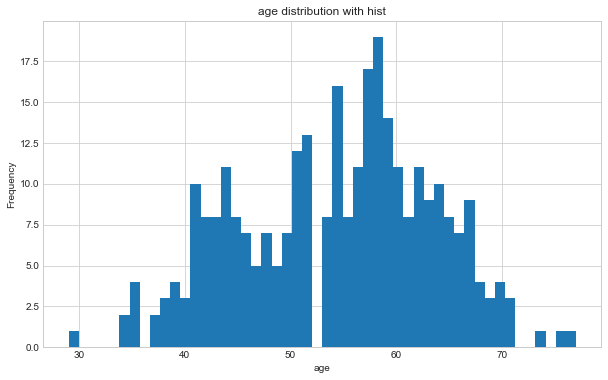

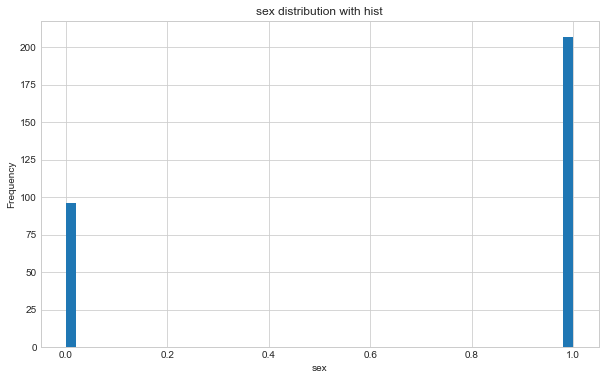

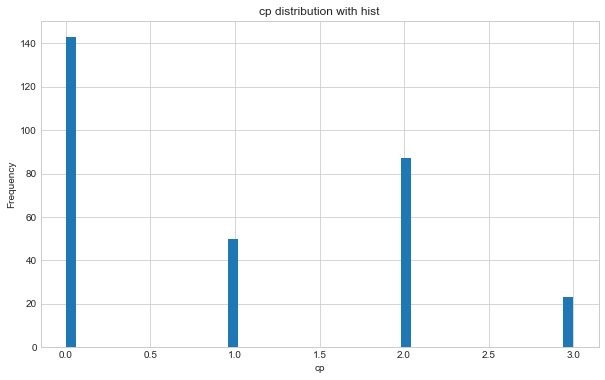

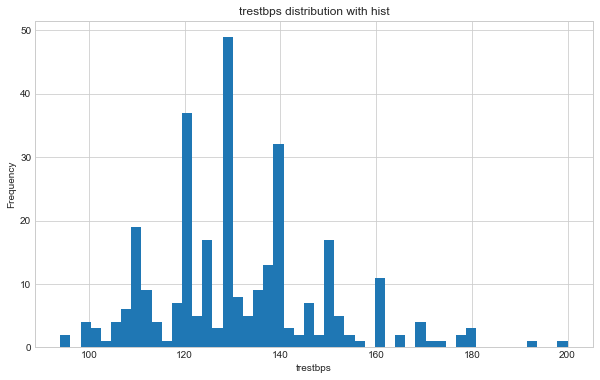

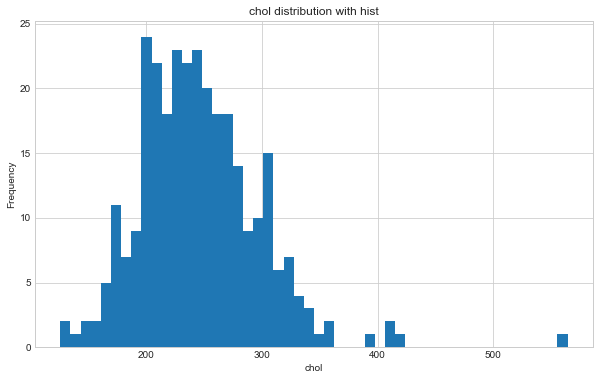

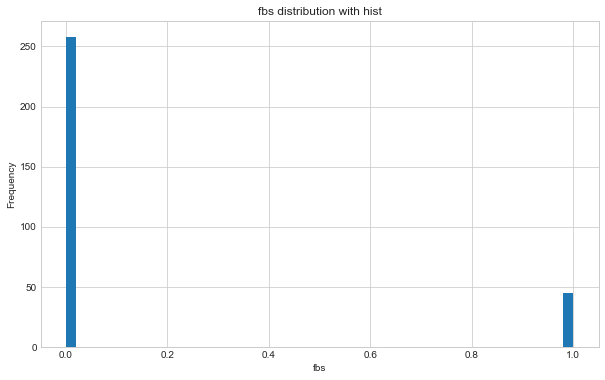

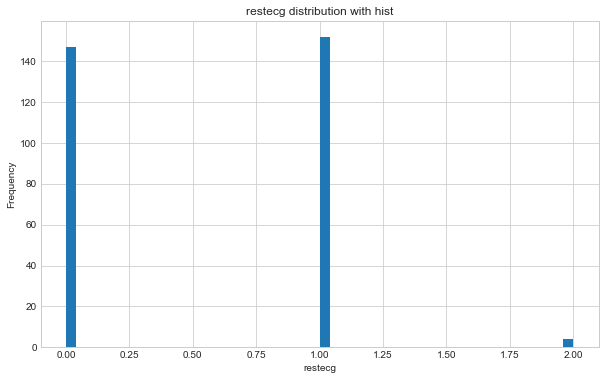

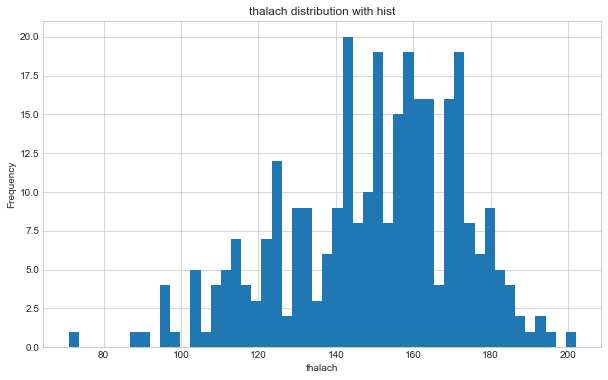

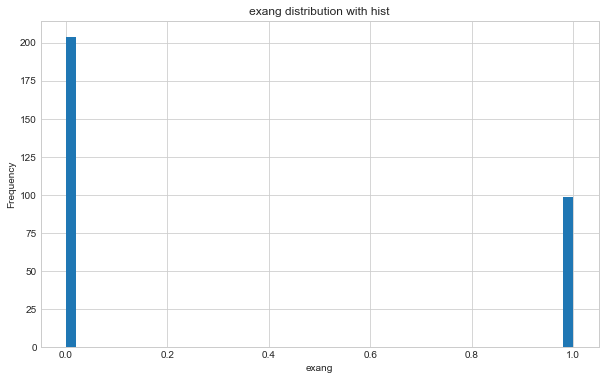

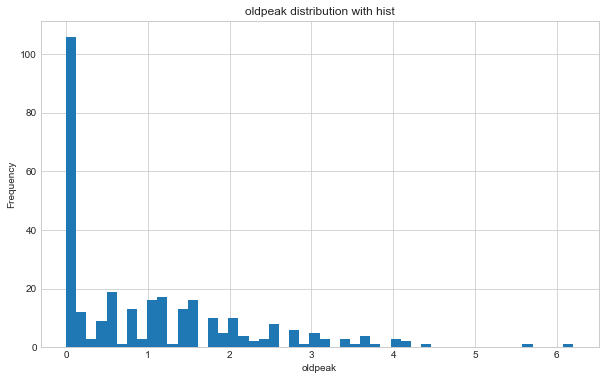

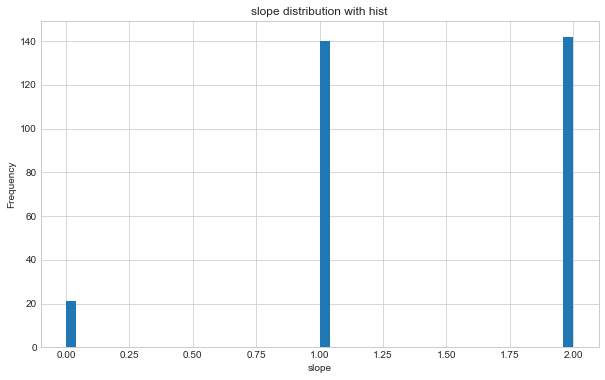

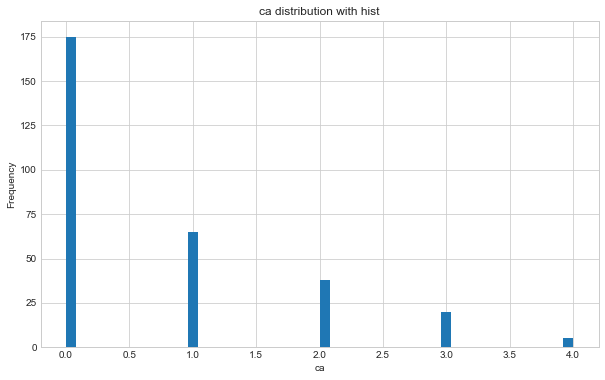

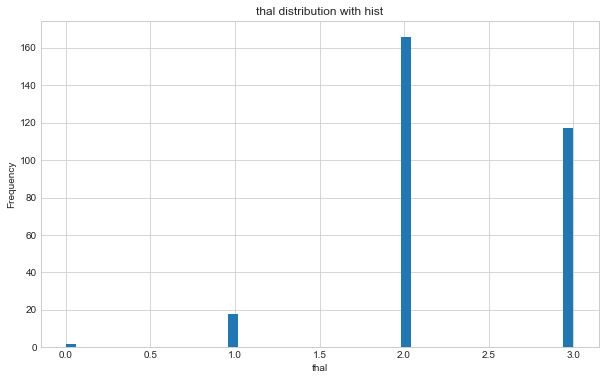

In [26]:
numericalValue = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
for n in numericalValue:
    plot_hist(n)

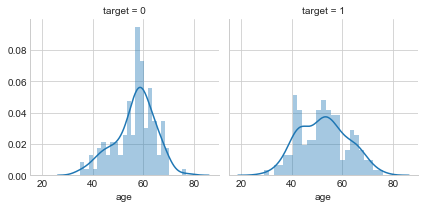

In [27]:
g = sns.FacetGrid(df, col = "target") #ortalamaya göre dağılomları göreceğiz
g.map(sns.distplot,"age", bins=25)
plt.show()

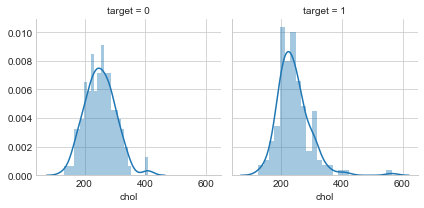

In [29]:
g = sns.FacetGrid(df, col = "target") #ortalamaya göre dağılomları göreceğiz
g.map(sns.distplot,"chol", bins=25)
plt.show()

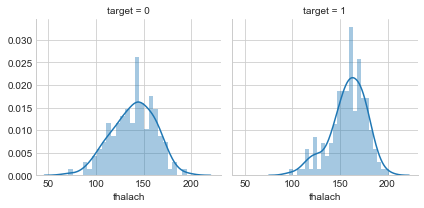

In [30]:
g = sns.FacetGrid(df, col = "target") #ortalamaya göre dağılomları göreceğiz
g.map(sns.distplot,"thalach", bins=25)
plt.show()

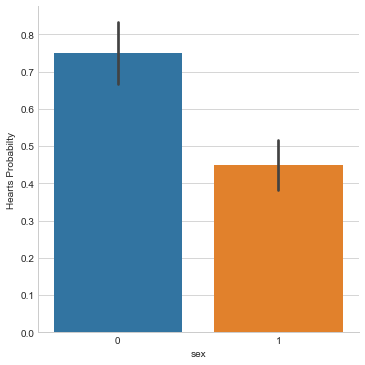

In [33]:
g = sns.factorplot(x = "sex", y="target", data=df, kind = "bar", size=5)
g.set_ylabels("Hearts Probabilty")

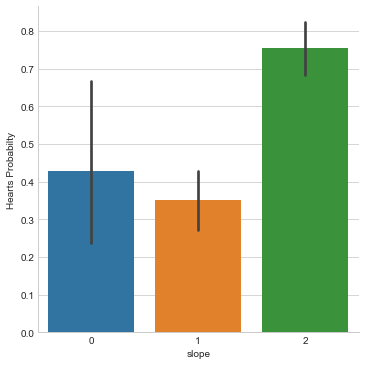

In [34]:
g= sns.factorplot(x = "slope", y="target", data=df, kind = "bar", size=5)
g.set_ylabels("Hearts Probabilty")

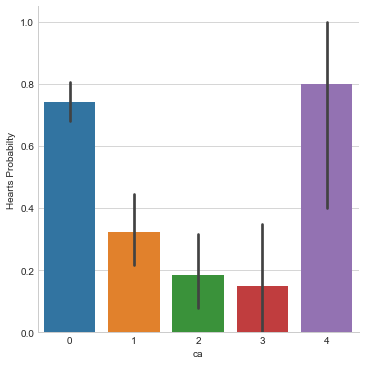

In [35]:
g= sns.factorplot(x = "ca", y="target", data=df, kind = "bar", size=5)
g.set_ylabels("Hearts Probabilty")

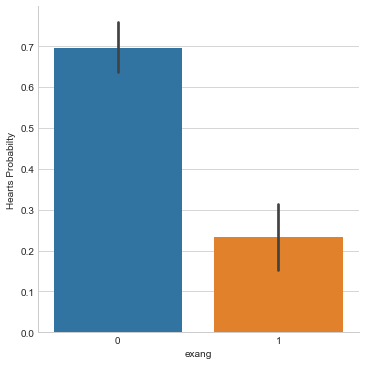

In [37]:
g= sns.factorplot(x = "exang", y="target", data=df, kind = "bar", size=5)
g.set_ylabels("Hearts Probabilty")

# Determine Dependent and Independent Variables

In [38]:
X = df.drop("target",axis=1)
y = df["target"]

# Scaling the Data

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
x = scaler.fit_transform(X)
x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

# 1. SVM Classification

## Train - Test Split

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)
print("X_train: {}\nX_test: {}\ny_train: {}\ny_test: {}".format(x_train.shape, x_test.shape, y_train.shape,y_test.shape))

X_train: (212, 13)
X_test: (91, 13)
y_train: (212,)
y_test: (91,)


## Model Fitting and Compare Actual and Predicted Labels

In [67]:
from sklearn.svm import SVC

In [68]:
svr_model = SVC()

In [69]:
svc_model.fit(x_train, y_train)

SVC()

In [70]:
y_pred = svc_model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [71]:
y_train_pred = svc_model.predict(x_train)
y_train_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

## Error Metrics

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 

In [72]:
def eval_metrics(actual,pred):
    pc = precision_score(actual,pred)
    rc = recall_score(actual,pred)
    acs = accuracy_score(actual,pred)
    F1_score = f1_score(actual, pred)
    print("Model testing performance")
    print("-------------------------")
    print(f'f1_score \t\t: {F1_score}')
    print(f'Precision \t\t: {pc}')
    print(f'Recall \t\t\t: {rc}')
    print(f'Accuracy \t\t: {acs}')

## Evaluate Model

In [65]:
eval_metrics(y_test, y_pred)

r2_score: 0.5561723283524744 
mae: 0.24425320824671928 
mse 0.11083632713042904 
rmse 0.3329209022131669


In [66]:
eval_metrics(y_train, y_train_pred)

r2_score: 0.8284660936289215 
mae: 0.13988832431412573 
mse 0.04233388415512645 
rmse 0.20575199672208883


In [73]:
#Classification results
eval_metrics(y_test, y_pred)

Model testing performance
-------------------------
f1_score 		: 0.8571428571428571
Precision 		: 0.8235294117647058
Recall 			: 0.8936170212765957
Accuracy 		: 0.8461538461538461


In [74]:
eval_metrics(y_train, y_train_pred)

Model testing performance
-------------------------
f1_score 		: 0.9294605809128631
Precision 		: 0.9105691056910569
Recall 			: 0.9491525423728814
Accuracy 		: 0.9198113207547169


CrossValidation

In [76]:
from sklearn.model_selection import cross_validate

In [78]:
model = SVC()

scores = cross_validate(model, x_train, y_train, scoring = ["accuracy",
                                                           "precision",
                                                           "recall","f1"],cv=10)

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_accuracy     0.783550
test_precision    0.796452
test_recall       0.839394
test_f1           0.811882
dtype: float64

With Best Parameters (GridSearchCV)

In [91]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {"C":[0.001, 0.01, 0.1, 0, 1],
             "kernel": ["linear","rbf","poly"],
             "gamma":["scale","auto"]}

In [97]:
model = SVC()

In [98]:
svc_grid_model = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [99]:
svc_grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ............C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ............C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ............C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ............C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ............C=0.001, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END ...............C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV 3/5] END ...............C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............C=0.001, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=0.001, gamma=scale, kernel=poly; total time=   0.0s
[CV 2/5] END ..............C=0.001, gamma=scale

[CV 1/5] END ...................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 2/5] END ..................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 3/5] END ..................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 4/5] END ..................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 5/5] END ..................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV 1/5] END .................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV 2/5] END .................C=1, gamma=auto, kernel=linear; total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [100]:
svc_grid_model.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [102]:
y_pred_grid = svc_grid_model.predict(x_test)

In [103]:
y_train_pred_grid = svc_grid_model.predict(x_train)

In [105]:
eval_metrics(y_train, y_train_pred_grid) 

Model testing performance
-------------------------
f1_score 		: 0.873015873015873
Precision 		: 0.8208955223880597
Recall 			: 0.9322033898305084
Accuracy 		: 0.8490566037735849


In [110]:
eval_metrics(y_test, y_pred_grid) 

Model testing performance
-------------------------
f1_score 		: 0.8712871287128713
Precision 		: 0.8148148148148148
Recall 			: 0.9361702127659575
Accuracy 		: 0.8571428571428571


# 2. Decision Trees Classification

## Train - Test Split

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print(x_train.shape, "-", x_test.shape, "-", y_train.shape, "-", y_test.shape)

(227, 13) - (76, 13) - (227,) - (76,)


## Model Fitting and Compare Actual and Predicted Labels

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
dct_model = DecisionTreeClassifier(criterion = "gini", min_samples_split=2)

In [120]:
dct_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [121]:
y_pred = dct_model.predict(x_test)

In [122]:
y_train_pred = dct_model.predict(x_train)

In [132]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

AttributeError: 'Series' object has no attribute 'reshape'

## Error Metrics

In [136]:
eval_metrics(y_train,y_train_pred)

Model testing performance
-------------------------
f1_score 		: 1.0
Precision 		: 1.0
Recall 			: 1.0
Accuracy 		: 1.0


In [135]:
eval_metrics(y_test,y_pred)

Model testing performance
-------------------------
f1_score 		: 0.8045977011494252
Precision 		: 0.7954545454545454
Recall 			: 0.813953488372093
Accuracy 		: 0.7763157894736842


## Evaluate Model

In [137]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [138]:
confusion_matrix(y_test, y_pred)

array([[24,  9],
       [ 8, 35]], dtype=int64)

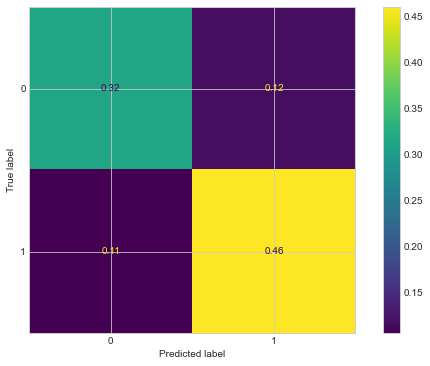

In [139]:
plot_confusion_matrix(dct_model,x_test,y_test,normalize="all");

In [141]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       122

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        33
           1       0.80      0.81      0.80        43

    accuracy                           0.78        76
   macro avg       0.77      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76



CrossValidation DecisionTree

In [ ]:
from sklearn.model_selection import cross_validate

In [143]:
model = DecisionTreeClassifier()

scores = cross_validate(model, x_train, y_train, scoring = ["accuracy",
                                                           "precision",
                                                           "recall","f1"],cv=10)

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_accuracy     0.740909
test_precision    0.741361
test_recall       0.794872
test_f1           0.765729
dtype: float64

GridSearchCV

In [144]:
from sklearn.model_selection import GridSearchCV

In [150]:
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2,4,6,8,10,12]}

In [151]:
model = DecisionTreeClassifier()

In [152]:
dct_grid_model = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [153]:
dct_grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....................criterion=gini, max_depth=2; total time=   0.0s
[CV 2/5] END ....................criterion=gini, max_depth=2; total time=   0.0s
[CV 3/5] END ....................criterion=gini, max_depth=2; total time=   0.0s
[CV 4/5] END ....................criterion=gini, max_depth=2; total time=   0.0s
[CV 5/5] END ....................criterion=gini, max_depth=2; total time=   0.0s
[CV 1/5] END ....................criterion=gini, max_depth=4; total time=   0.0s
[CV 2/5] END ....................criterion=gini, max_depth=4; total time=   0.0s
[CV 3/5] END ....................criterion=gini, max_depth=4; total time=   0.0s
[CV 4/5] END ....................criterion=gini, max_depth=4; total time=   0.0s
[CV 5/5] END ....................criterion=gini, max_depth=4; total time=   0.0s
[CV 1/5] END ....................criterion=gini, max_depth=6; total time=   0.0s
[CV 2/5] END ....................criterion=gini,

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             verbose=3)

In [154]:
dct_grid_model.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [155]:
y_pred_grid = dct_grid_model.predict(x_test)

In [156]:
y_train_pred_grid = dct_grid_model.predict(x_train)

In [160]:
eval_metrics(y_train, y_train_pred_grid) 

Model testing performance
-------------------------
f1_score 		: 0.9672131147540983
Precision 		: 0.9672131147540983
Recall 			: 0.9672131147540983
Accuracy 		: 0.9647577092511013


In [158]:
eval_metrics(y_test, y_pred_grid) 

Model testing performance
-------------------------
f1_score 		: 0.7906976744186046
Precision 		: 0.7906976744186046
Recall 			: 0.7906976744186046
Accuracy 		: 0.7631578947368421


# 3. Random Forest Classification

## Train - Test Split

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2,random_state=42)

## Model Fitting and Compare Actual and Predicted Labels

In [164]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, max_features="auto",random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [165]:
y_pred = model.predict(x_test)

In [166]:
y_train_pred = model.predict(x_train)

## Error Metrics

In [168]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [169]:
confusion_matrix(y_test, y_pred)

array([[26,  3],
       [ 6, 26]], dtype=int64)

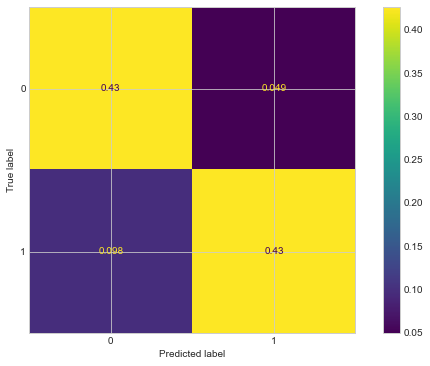

In [170]:
plot_confusion_matrix(model, x_test, y_test, normalize="all")

## Evaluate Model

In [171]:
eval_metrics(y_train,y_train_pred)

Model testing performance
-------------------------
f1_score 		: 0.9962264150943396
Precision 		: 1.0
Recall 			: 0.9924812030075187
Accuracy 		: 0.9958677685950413


In [172]:
eval_metrics(y_test,y_pred)

Model testing performance
-------------------------
f1_score 		: 0.8524590163934426
Precision 		: 0.896551724137931
Recall 			: 0.8125
Accuracy 		: 0.8524590163934426


CrossValidation RandomForest

In [173]:
model = RandomForestClassifier()

scores = cross_validate(model, x_train, y_train, scoring = ["accuracy",
                                                           "precision",
                                                           "recall","f1"],cv=10)

df_scores = pd.DataFrame(scores, index=range(1,11))
df_scores.mean()[2:]

test_accuracy     0.801667
test_precision    0.822926
test_recall       0.827473
test_f1           0.821291
dtype: float64

GridSearch RandomForest

In [187]:
param_grid = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

In [188]:
model = DecisionTreeClassifier()

In [189]:
rf_grid_model = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [190]:
rf_grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 198 candidates, totalling 990 fits
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5; to

[CV 4/5] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 2/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 3/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 4/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 5/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 1/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 2/5] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 3/5] END max_depth=20, max_features=auto

[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 2/5] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 3/5] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 4/5] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 5/5] END max_depth=30, max_features=a

[CV 5/5] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 1/5] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV 2/5] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV 3/5] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV 4/5] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 2/5] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 3/5] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 4/5] END max_depth=40, max_features=s

[CV 3/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV 4/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 2/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 3/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 4/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 5/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 1/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 2/5] END max_depth=50, max_features=sqr

[CV 3/5] END max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV 4/5] END max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 2/5] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 3/5] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 4/5] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 5/5] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2; total time=   0.0s
[CV 1/5] END max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 2/5] END max_depth=60, max_features=sqr

[CV 5/5] END max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 2/5] END max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 3/5] END max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 4/5] END max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 5/5] END max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 1/5] END max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV 2/5] END max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV 3/5] END max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV 4/5] END max_depth=80, max_features=auto,

[CV 2/5] END max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 3/5] END max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 4/5] END max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 5/5] END max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 1/5] END max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 2/5] END max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 3/5] END max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 4/5] END max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 5/5] END max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV 1/5] END max_depth=90, max_features=auto, 

[CV 4/5] END max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 5/5] END max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV 1/5] END max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV 2/5] END max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV 3/5] END max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV 4/5] END max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 2/5] END max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV 3/5] END max_depth=100, max_

[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV 4/5] END max_depth=

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [191]:
y_pred_grid = rf_grid_model.predict(x_test)

In [192]:
y_train_pred_grid = rf_grid_model.predict(x_train)

In [193]:
eval_metrics(y_train, y_train_pred_grid) 

Model testing performance
-------------------------
f1_score 		: 0.8778625954198472
Precision 		: 0.8914728682170543
Recall 			: 0.8646616541353384
Accuracy 		: 0.8677685950413223


In [194]:
eval_metrics(y_test, y_pred_grid) 

Model testing performance
-------------------------
f1_score 		: 0.7719298245614036
Precision 		: 0.88
Recall 			: 0.6875
Accuracy 		: 0.7868852459016393
